# Mnist 글씨체 학습

## 기본 예제

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import tensorflow.keras as keras
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint


In [2]:
data = pd.read_csv('../9.데이터/mnist/mnist_train_small.csv', header=None)
data = np.array(data)

In [3]:
x_train = data[:, 1:]
y_train = data[:, 0]

x_train = x_train.reshape(x_train.shape[0],28,28)
x_train = np.expand_dims(x_train, -1)
y_train = keras.utils.to_categorical(y_train)

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

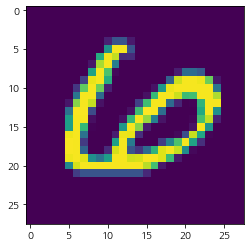

In [4]:
plt.imshow(x_train[0,:,:])
y_train[0]

In [5]:
data_test = pd.read_csv('../9.데이터/mnist/mnist_test.csv', header=None)
data_test = np.array(data_test)

x_test = data_test[:, 1:]
y_test = data_test[:, 0]
x_test = x_test.reshape(x_test.shape[0],28,28)
x_test_in = np.expand_dims(x_test, -1)

In [18]:
model = Sequential()
model.add(layers.Conv2D(filters=8, kernel_size = 3, input_shape=(28,28,1), activation='relu'))
model.add(layers.Conv2D(filters=16, kernel_size = 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
219/219 [==============================] - 1s 5ms/step - loss: 4.0946 - accuracy: 0.8496 - val_loss: 0.2228 - val_accuracy: 0.9443
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 0.1062 - accuracy: 0.9691 - val_loss: 0.1504 - val_accuracy: 0.9595
Epoch 3/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0360 - accuracy: 0.9901 - val_loss: 0.1789 - val_accuracy: 0.9613
Epoch 4/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.2351 - val_accuracy: 0.9637
Epoch 5/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.2572 - val_accuracy: 0.9658
Epoch 6/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.2536 - val_accuracy: 0.9693
Epoch 7/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.2815 - val_accuracy: 0.9692
Epoch 

In [20]:
o = model.predict(x_test_in)

In [21]:
o_result = np.argmax(o,1)

In [22]:
sum(o_result == y_test)/10000

0.9682

## 예제 변형

### MaxPooling 레이어 추가

#### 1개 추가

In [23]:
model = Sequential()
model.add(layers.Conv2D(filters=8, kernel_size = 3, input_shape=(28,28,1), activation='relu'))
model.add(layers.Conv2D(filters=16, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
219/219 [==============================] - 1s 5ms/step - loss: 1.8770 - accuracy: 0.8154 - val_loss: 0.2477 - val_accuracy: 0.9338
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 0.1523 - accuracy: 0.9558 - val_loss: 0.1444 - val_accuracy: 0.9592
Epoch 3/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0707 - accuracy: 0.9810 - val_loss: 0.1323 - val_accuracy: 0.9645
Epoch 4/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.1357 - val_accuracy: 0.9687
Epoch 5/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0223 - accuracy: 0.9923 - val_loss: 0.1521 - val_accuracy: 0.9692
Epoch 6/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.1411 - val_accuracy: 0.9730
Epoch 7/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0070 - accuracy: 0.9976 - val_loss: 0.1732 - val_accuracy: 0.9735
Epoch 

In [25]:
o = model.predict(x_test_in)
o_result = np.argmax(o,1)
sum(o_result == y_test)/10000

0.9718

#### 2개 추가

In [26]:
model = Sequential()
model.add(layers.Conv2D(filters=8, kernel_size = 3, input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters=16, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
219/219 [==============================] - 1s 4ms/step - loss: 2.9919 - accuracy: 0.7774 - val_loss: 0.5016 - val_accuracy: 0.9155
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 0.3459 - accuracy: 0.9283 - val_loss: 0.3311 - val_accuracy: 0.9320
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 0.1798 - accuracy: 0.9547 - val_loss: 0.2361 - val_accuracy: 0.9472
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 0.1171 - accuracy: 0.9680 - val_loss: 0.2136 - val_accuracy: 0.9495
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0864 - accuracy: 0.9754 - val_loss: 0.1910 - val_accuracy: 0.9565
Epoch 6/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0670 - accuracy: 0.9801 - val_loss: 0.1869 - val_accuracy: 0.9577
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0539 - accuracy: 0.9841 - val_loss: 0.1700 - val_accuracy: 0.9622
Epoch 

In [28]:
o = model.predict(x_test_in)
o_result = np.argmax(o,1)
sum(o_result == y_test)/10000

0.9728

### 뉴런개수 추가

In [29]:
model = Sequential()
model.add(layers.Conv2D(filters=16, kernel_size = 3, input_shape=(28,28,1), activation='relu'))
model.add(layers.Conv2D(filters=32, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
219/219 [==============================] - 1s 6ms/step - loss: 1.4091 - accuracy: 0.8734 - val_loss: 0.1531 - val_accuracy: 0.9512
Epoch 2/10
219/219 [==============================] - 1s 5ms/step - loss: 0.1068 - accuracy: 0.9668 - val_loss: 0.1406 - val_accuracy: 0.9628
Epoch 3/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0589 - accuracy: 0.9816 - val_loss: 0.1174 - val_accuracy: 0.9698
Epoch 4/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0403 - accuracy: 0.9880 - val_loss: 0.1191 - val_accuracy: 0.9718
Epoch 5/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.1371 - val_accuracy: 0.9737
Epoch 6/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.1583 - val_accuracy: 0.9737
Epoch 7/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0104 - accuracy: 0.9964 - val_loss: 0.1682 - val_accuracy: 0.9743
Epoch 

In [31]:
o = model.predict(x_test_in)
o_result = np.argmax(o,1)
sum(o_result == y_test)/10000

0.9775

### Dense 레이어 추가

In [7]:
model = Sequential()
model.add(layers.Conv2D(filters=16, kernel_size = 3, input_shape=(28,28,1), activation='relu'))
model.add(layers.Conv2D(filters=32, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
219/219 [==============================] - 1s 6ms/step - loss: 0.9781 - accuracy: 0.8861 - val_loss: 0.1554 - val_accuracy: 0.9585
Epoch 2/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0961 - accuracy: 0.9714 - val_loss: 0.1701 - val_accuracy: 0.9577
Epoch 3/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0473 - accuracy: 0.9859 - val_loss: 0.1033 - val_accuracy: 0.9783
Epoch 4/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0259 - accuracy: 0.9912 - val_loss: 0.1792 - val_accuracy: 0.9672
Epoch 5/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0192 - accuracy: 0.9945 - val_loss: 0.2028 - val_accuracy: 0.9693
Epoch 6/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0147 - accuracy: 0.9956 - val_loss: 0.2635 - val_accuracy: 0.9660
Epoch 7/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0168 - accuracy: 0.9962 - val_loss: 0.1934 - val_accuracy: 0.9790
Epoch 

In [9]:
o = model.predict(x_test_in)
o_result = np.argmax(o,1)
sum(o_result == y_test)/10000

0.9759

### optimizers 변경

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 596,042
Trainable params: 596,042
Non-trainable params: 0
________________________________________________

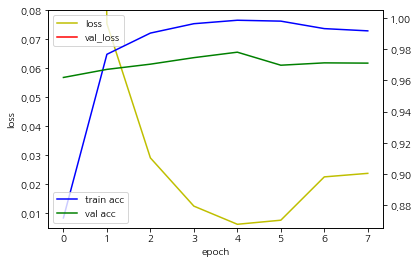

Saved model to disk : test.h5


In [23]:
model_name = 'test'
cb_checkpoint,cb_earlystopping = model_save_erstp(MODEL_SAVE_FOLDER_PATH, model_name)

model = Sequential()
model.add(layers.Conv2D(filters=16, kernel_size = 3, input_shape=(28,28,1), activation='relu'))
model.add(layers.Conv2D(filters=32, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.3, callbacks=[cb_checkpoint,cb_earlystopping])
loss_graph('loss','val_loss',0.005,0.08)


# 모델 저장
MODEL_SAVE_FOLDER_PATH = '../2.모델저장/'
file_name = model_name
json_model_saver(MODEL_SAVE_FOLDER_PATH,file_name)

In [8]:
o = model.predict(x_test_in)
o_result = np.argmax(o,1)
sum(o_result == y_test)/10000

0.9832